In [143]:
import re
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords

data=pd.read_csv("whiskey1.csv")
df=pd.DataFrame(data)

df['Score']=df['Score'].apply(lambda x:re.search(r'[0-9]+',x).group(0))
df.Score

0       97
1       97
2       96
3       96
4       96
5       96
6       96
7       96
8       95
9       95
10      95
11      95
12      95
13      95
14      95
15      95
16      95
17      95
18      95
19      95
20      95
21      95
22      95
23      95
24      95
25      95
26      95
27      94
28      94
29      94
        ..
3744    86
3745    86
3746    86
3747    86
3748    86
3749    85
3750    85
3751    85
3752    85
3753    85
3754    85
3755    84
3756    84
3757    84
3758    84
3759    83
3760    83
3761    83
3762    83
3763    82
3764    81
3765    81
3766    81
3767    81
3768    81
3769    80
3770    80
3771    80
3772    80
3773    78
Name: Score, Length: 3774, dtype: object

In [144]:
df['Score']=df['Score'].apply(lambda x: int(x))
rank=df.groupby(['Category']).mean().sort_values(by="Score", ascending=False)
rank=rank.round()
fig = go.Figure(data=[go.Table(
    header=dict(values=["Category","Score"],
                fill_color='peru',
                align='left'),
    cells=dict(values=[ rank.index, rank.Score],
               fill_color=[['burlywood','navajowhite']*10],
               align='left'))
])

fig.show()

In [145]:
df['Review']
# Fill na with empty string
df['Review'] = df['Review'].fillna('')
stop = stopwords.words('english')
# Convert all the string to lower cases
df['Review'] = df['Review'].str.lower()
# \S+ means anything that is not an empty space
df['Review'] = df['Review'].apply(lambda x: re.sub('http\S*', '', x))
# \s+ means all empty space (\n, \r, \t)
df['Review'] = df['Review'].apply(lambda x: re.sub('\s+', ' ', x))
df['Review'] = df['Review'].apply(lambda text: " ".join(word for word in text.split() if word not in stop))
df['Review'] = df['Review'].apply(lambda x: re.sub('[^\w\s]', '', x))
df.Review.count()
df[df.Review.str.contains("nose")].count()
df[df.Review.str.contains("finish")].count()
df.Reviewer.nunique()
flavor=df.loc[df.Review.str.contains("nose"),['Review']]
flavor=flavor.assign(Palate=df.Review[df.Review.str.contains("palate")])
flavor=flavor.assign(Finish=df.Review[df.Review.str.contains("finish")])
flavor.to_csv('flavor.csv')
df['Review']

0       impresses whisky evolves incredibly complex no...
1       legendary bowmores mid60s every bit equal shar...
2       deep gold color surprisingly lively nose age c...
3       definitely showing age bad way  distillery cha...
4       dalmore one handful whiskies seem able age cas...
5       rich amber color elegantly oxidized notes gree...
6       its great glenlivet releases whiskies cellar c...
7       classic sherry caskaged macallan antique amber...
8       cask 3145 lighter color sweet notes balance sm...
9       part permanent ardbeg range since 2008 corryvr...
10      expression matured european oak oloroso sherry...
11      whisky sensational glorious mix ginseng syrup ...
12      astonishingly fresh clean 30 years oak incredi...
13      bottled 2004 recently put circulation us very ...
14      whisky positive aspects mature whisky depth co...
15      though brora acquired cult status said years s...
16      maturation 1978 distillate taken place europea...
17      quite 

In [146]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['Review']=df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df['Review']

0       impress whiski evolv incred complex nose palat...
1       legendari bowmor mid60 everi bit equal share r...
2       deep gold color surprisingli live nose age com...
3       definit show age bad way distilleri charact st...
4       dalmor one hand whiski seem abl age cask mani ...
5       rich amber color elegantli oxid note greet you...
6       it great glenlivet releas whiski cellar collec...
7       classic sherri caskag macallan antiqu amber hi...
8       cask 3145 lighter color sweet note balanc smok...
9       part perman ardbeg rang sinc 2008 corryvreckan...
10      express matur european oak oloroso sherri butt...
11      whiski sensat gloriou mix ginseng syrup bake b...
12      astonishingli fresh clean 30 year oak incred d...
13      bottl 2004 recent put circul us veri strang it...
14      whiski posit aspect matur whiski depth complex...
15      though brora acquir cult statu said year speci...
16      matur 1978 distil taken place european oak ref...
17      quit s

In [147]:
from nltk import WordNetLemmatizer

lemztr = WordNetLemmatizer()

df['Review']=df['Review'].apply(lambda x: ' '.join([lemztr.lemmatize(word) for word in x.split()]))
df['Review'] = df['Review'].apply(lambda x: re.sub('[0-9]{4}', ' ', x))
df['Review']

0       impress whiski evolv incred complex nose palat...
1       legendari bowmor mid60 everi bit equal share r...
2       deep gold color surprisingli live nose age com...
3       definit show age bad way distilleri charact st...
4       dalmor one hand whiski seem abl age cask mani ...
5       rich amber color elegantli oxid note greet you...
6       it great glenlivet releas whiski cellar collec...
7       classic sherri caskag macallan antiqu amber hi...
8       cask   lighter color sweet note balanc smoke s...
9       part perman ardbeg rang sinc   corryvreckan cr...
10      express matur european oak oloroso sherri butt...
11      whiski sensat gloriou mix ginseng syrup bake b...
12      astonishingli fresh clean 30 year oak incred d...
13      bottl   recent put circul u veri strang it wor...
14      whiski posit aspect matur whiski depth complex...
15      though brora acquir cult statu said year speci...
16      matur   distil taken place european oak refil ...
17      quit s

In [148]:
from nltk.tokenize import word_tokenize 
df['Review'] = df['Review'].apply(lambda x: word_tokenize(x))
df['Review']

0       [impress, whiski, evolv, incred, complex, nose...
1       [legendari, bowmor, mid60, everi, bit, equal, ...
2       [deep, gold, color, surprisingli, live, nose, ...
3       [definit, show, age, bad, way, distilleri, cha...
4       [dalmor, one, hand, whiski, seem, abl, age, ca...
5       [rich, amber, color, elegantli, oxid, note, gr...
6       [it, great, glenlivet, releas, whiski, cellar,...
7       [classic, sherri, caskag, macallan, antiqu, am...
8       [cask, lighter, color, sweet, note, balanc, sm...
9       [part, perman, ardbeg, rang, sinc, corryvrecka...
10      [express, matur, european, oak, oloroso, sherr...
11      [whiski, sensat, gloriou, mix, ginseng, syrup,...
12      [astonishingli, fresh, clean, 30, year, oak, i...
13      [bottl, recent, put, circul, u, veri, strang, ...
14      [whiski, posit, aspect, matur, whiski, depth, ...
15      [though, brora, acquir, cult, statu, said, yea...
16      [matur, distil, taken, place, european, oak, r...
17      [quit,

In [149]:
df.Reviewer.apply(lambda x: x.strip())

0          John Hansell
1            Dave Broom
2          John Hansell
3          John Hansell
4          John Hansell
5            Dave Broom
6          John Hansell
7          John Hansell
8          John Hansell
9           Gavin Smith
10          Gavin Smith
11           Dave Broom
12         John Hansell
13         John Hansell
14         John Hansell
15           Dave Broom
16          Gavin Smith
17         John Hansell
18         John Hansell
19         John Hansell
20         John Hansell
21         John Hansell
22          Gavin Smith
23         John Hansell
24         John Hansell
25         John Hansell
26         John Hansell
27          Gavin Smith
28         John Hansell
29          Gavin Smith
             ...       
3744         Dave Broom
3745    Jonny McCormick
3746         Dave Broom
3747         Dave Broom
3748    Jonny McCormick
3749         Dave Broom
3750         Dave Broom
3751         Dave Broom
3752    Jonny McCormick
3753    Jonny McCormick
3754    Jonny Mc

In [150]:
from scipy import stats
group=df.groupby(['Category'])
A=df.groupby(['Category'])['Score'].shift(-1)
A=A.dropna()
group['Score'].apply(lambda x: stats.ttest_ind(x,A))


Category
Blended Malt Scotch Whisky         (2.379708711766155, 0.017373747130694436)
Blended Scotch Whisky              (1.3377403003139108, 0.18105681878552948)
Bourbon/Tennessee                 (5.106642557200167, 3.417398973186593e-07)
Canadian                         (-3.6198993722205275, 0.000298351142252484)
Grain Scotch Whisky               (-0.9013222314737411, 0.36747430331605735)
Irish                               (1.543057213006129, 0.12289863493839812)
Japanese                           (1.7970204063981778, 0.07241048318164683)
New Zealand                     (-3.4106743347611985, 0.0006548328198131534)
Rye Whiskey                        (1.8914754410074726, 0.05863416574791947)
Single Malt Scotch               (-2.8847622632903733, 0.003931633168918085)
Unspecified Single Malt             (-2.3455660013417, 0.019049803683226556)
Name: Score, dtype: object

In [151]:
B=df.groupby(['Category'])['Score'].shift(-2)
B=B.dropna()
group['Score'].apply(lambda x: stats.ttest_ind(x,B))

Category
Blended Malt Scotch Whisky           (2.450406305879117, 0.01431290834293367)
Blended Scotch Whisky                (1.4181146346602616, 0.1562350618397683)
Bourbon/Tennessee                 (5.233577974782297, 1.7399033376616465e-07)
Canadian                        (-3.5566055567846817, 0.00038002410864703507)
Grain Scotch Whisky                (-0.8786927178850198, 0.37962378830970733)
Irish                                (1.598984092584209, 0.10990598068276355)
Japanese                            (1.8517159993354129, 0.06414310907045233)
New Zealand                        (-3.406383989072569, 0.000665199305334056)
Rye Whiskey                        (1.9614588955658303, 0.049896013330167244)
Single Malt Scotch                (-2.7092630497355064, 0.006763277816763208)
Unspecified Single Malt           (-2.3408371840807387, 0.019292588695640697)
Name: Score, dtype: object

In [152]:
stats.ttest_ind(df[df['Category']=='Bourbon/Tenessee']['Score'],df[df['Category']=='Rye Whiskey']['Score'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [11]:
pd.DataFrame(df.loc[df['Category']=='Bourbon']['Score'])

,Score


In [12]:
df[df['Category']=='Bourbon/Tenessee']

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol


In [13]:
df

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol
0,Black Bowmore 42 year old 1964 vintage,"[impress, whiski, evolv, incred, complex, nose...",97,Single Malt Scotch,John Hansell,"$4,500",Summer 2008,40.50%
1,Bowmore 46 year old (distilled 1964),"[legendari, bowmor, mid60, everi, bit, equal, ...",97,Single Malt Scotch,Dave Broom,"$13,500",Fall 2012,42.90%
2,Gold Bowmore 1964 vintage,"[deep, gold, color, surprisingli, live, nose, ...",96,Single Malt Scotch,John Hansell,"$6,250",Winter 2009,42.40%
3,Bowmore 40 year old,"[definit, show, age, bad, way, distilleri, cha...",96,Single Malt Scotch,John Hansell,"$11,000",Summer 2011,44.80%
4,The Dalmore 50 year old,"[dalmor, one, hand, whiski, seem, abl, age, ca...",96,Single Malt Scotch,John Hansell,"$1,500",Fall 2009,52.80%
5,Glenfarclas Family Casks 1954 (Cask #1260),"[rich, amber, color, elegantli, oxid, note, gr...",96,Single Malt Scotch,Dave Broom,"$3,360",Fall 2014,47.20%
6,The Glenlivet Cellar Collection 1969 vintage,"[it, great, glenlivet, releas, whiski, cellar,...",96,Single Malt Scotch,John Hansell,$750,Winter 2007,50.80%
7,The Macallan 29 year old 1976 Vintage (Cask #1...,"[classic, sherri, caskag, macallan, antiqu, am...",96,Single Malt Scotch,John Hansell,"$1,500",Spring 2008,45.40%
8,Ardbeg 1974 Vintage (Cask #3145),"[cask, lighter, color, sweet, note, balanc, sm...",95,Single Malt Scotch,John Hansell,"$20,000",Spring 2008,49.90%
9,Ardbeg Corryvreckan,"[part, perman, ardbeg, rang, sinc, corryvrecka...",95,Single Malt Scotch,Gavin Smith,$90,Fall 2018,57.10%


In [14]:
pd.DataFrame(df[df['Category']=='Rye Whiskey']['Score'])

,Score


In [153]:
stats.ttest_ind(df.loc[df.Category=='Blended Malt Scotch Whisky  ']['Score'],df.loc[df.Category=='Blended Scotch Whisky  ']['Score'])

Ttest_indResult(statistic=1.086020390853035, pvalue=0.27808412004438765)

In [16]:
df[df['Category']=='Bourbon/Tennessee  ']

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol
2640,Four Roses Limited Edition Small Batch (2013 R...,"[marriag, 13, 18, year, old, bourbon, matur, y...",97,Bourbon/Tennessee,John Hansell,$85,Winter 2013,51.50%
2641,Parker's Heritage Collection,"[bottl, celebr, master, distil, parker, beam, ...",97,Bourbon/Tennessee,John Hansell,$150.00,Fall 2009,50%
2642,Pappy Van Winkle's Family Reserve (Bottle B1986),"[review, whiskey, year, back, indic, woodi, pa...",96,Bourbon/Tennessee,John Hansell,$220.00,Summer 2009,47.80%
2643,William Larue Weller,"[whiskey, improv, greatli, past, two, year, i,...",96,Bourbon/Tennessee,John Hansell,$65.00,Spring 2010,67.40%
2644,William Larue Weller,"[similar, last, year, releas, a, good, thing, ...",96,Bourbon/Tennessee,John Hansell,$70.00,Spring 2011,63.30%
2645,William Larue Weller 12 year old (2018 Buffalo...,"[till, earth, tobacco, leather, meet, clover, ...",96,Bourbon/Tennessee,Jeffery Lindenmuth,$99,Winter 2018,62.85%
2646,Four Roses Limited Edition Small Batch (2012 R...,"[marriag, four, differ, bourbon, rang, 11, 17,...",96,Bourbon/Tennessee,John Hansell,$90,Winter 2012,55.70%
2647,Four Roses Small Batch Limited Edition Al Youn...,"[caramelladen, fruit, bouquet, follow, unend, ...",96,Bourbon/Tennessee,Fred Minnick,$150,Summer 2017,54.49%
2648,George T. Stagg,"[anoth, excel, stagg, consid, alcohol, level, ...",96,Bourbon/Tennessee,John Hansell,$70.00,Winter 2012,71.40%
2649,George T. Stagg,"[age, statement, distil, beauti, express, stag...",96,Bourbon/Tennessee,John Hansell,$80,Winter 2014,69.05%


In [17]:
A=df[['Price','Score']]

In [18]:
correlation=A.corr(method='pearson')

In [154]:

def finder(x):
    try:
        return re.search(r'[0-9][0-9] year old', x).group(0)
    except:
        return str(0)
        
df=df.assign(Age=df['Whiskey'].apply(lambda x: finder(x)))    

In [155]:
df['Age'] = df.Age.apply(lambda x: re.sub('[^0-9.]', '',x))

In [156]:
df['Age']=df.Age.apply(lambda x: int(x))

In [157]:
df['Price'] = df.Price.apply(lambda x: re.sub('[^0-9.]', '',x))
df['Price'] = df.Price.apply(lambda x: float(x))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



(0, 250)

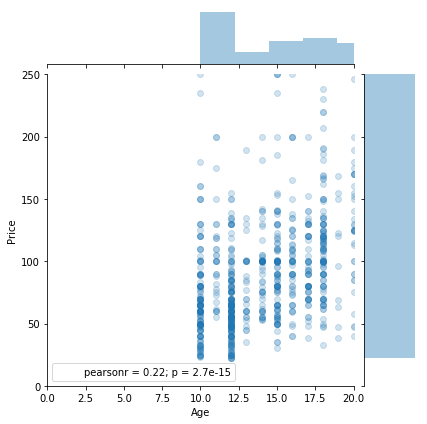

In [158]:
import seaborn as sns
df.Price=df.Price.loc[(df.Price-df.Price.mean()).abs()/df.Price.std()<3]
plot=sns.jointplot(df[df.Age>0].Age, df['Price'], alpha=0.2)
plot.ax_marg_x.set_xlim(0, 20)
plot.ax_marg_y.set_ylim(0, 250)

In [159]:
df.Price.std()

5708.4492352084835

In [160]:
df.Reviewer.apply(lambda x: x.strip())
reviewers=df.groupby(['Reviewer','Category']).mean().sort_values(by='Score', ascending=False)

In [165]:
reviewers.loc[(' Geoffrey Kleinman ')]

,Score,Price,Age
Category,,,
Irish,96.000000,135.00000,13.000000
Bourbon/Tennessee,90.500000,41.00000,5.000000
Blended Scotch Whisky,89.666667,110.00000,0.000000
Grain Scotch Whisky,89.000000,100.00000,0.000000
Canadian,88.000000,60.00000,10.000000
Single Malt Scotch,87.074074,149.62963,13.518519
Blended Malt Scotch Whisky,84.000000,100.00000,10.000000


In [162]:
reviewers

,,Score,Price,Age
Reviewer,Category,,,
Geoffrey Kleinman,Irish,96.000000,135.000000,13.000000
Jeffery Lindenmuth,Japanese,94.000000,65.000000,0.000000
Adam Polonski,Single Malt Scotch,92.000000,90.000000,18.000000
David Fleming,Single Malt Scotch,92.000000,175.000000,11.000000
Dave Broom,Blended Scotch Whisky,91.500000,78585.000000,10.500000
Geoffrey Kleinman,Bourbon/Tennessee,90.500000,41.000000,5.000000
John Hansell,Japanese,90.333333,251.666667,6.000000
Jeffery Lindenmuth,Bourbon/Tennessee,90.186441,2317.372881,3.677966
Adam Polonski,Bourbon/Tennessee,90.000000,50.000000,0.000000


In [163]:
reviewers.loc

In [164]:
df[df.Reviewer==' Geoffrey Kleinman ']

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol,Age
63,Scotch Malt Whisky Society Hunting Hound on Ho...,"[nose, tell, special, whiski, old, dark, lacqu...",94,Single Malt Scotch,Geoffrey Kleinman,225.0,Winter 2014,51.30%,24
139,Exclusive Malts Speyside 25 year old 1989 Cask #3,"[exclus, malt, disclos, sourc, distilleri, mat...",93,Single Malt Scotch,Geoffrey Kleinman,200.0,Winter 2014,48.80%,25
141,The Scotch Malt Whisky Society Pigs in Plaster...,"[singl, cask, distil, highland, park, excel, e...",93,Single Malt Scotch,Geoffrey Kleinman,140.0,Fall 2015,59.10%,14
235,Tomintoul Reserve 37 year old,"[youd, expect, malt, age, instead, oak, domin,...",92,Single Malt Scotch,Geoffrey Kleinman,600.0,Spring 2015,43%,37
238,Oban Little Bay,"[final, unimpeach, counterpoint, ralli, cri, a...",92,Single Malt Scotch,Geoffrey Kleinman,75.0,Fall 2015,43%,0
505,The Exclusive Malts (distilled at Glen Garioch...,"[oldstyl, whiski, harken, back, time, scotland...",90,Single Malt Scotch,Geoffrey Kleinman,160.0,Summer 2015,56.60%,20
515,Scotch Malt Whisky Society Berber Whiskey With...,"[much, caol, ila, malt, goe, johnni, walker, b...",90,Single Malt Scotch,Geoffrey Kleinman,130.0,Winter 2014,57.50%,12
636,Exclusive Malts (distilled at Linkwood) 14 yea...,"[speysid, distilleri, whose, malt, commonli, f...",89,Single Malt Scotch,Geoffrey Kleinman,105.0,Fall 2014,55.80%,14
691,Exclusive Malts (distilled at Ardmore) 14 year...,"[need, proof, scotch, whiski, dont, fit, neatl...",89,Single Malt Scotch,Geoffrey Kleinman,130.0,Winter 2014,54.30%,14
753,Exclusive Malts (distilled at Bunnahabhain) 26...,"[peat, whiski, definit, drop, point, becom, ol...",88,Single Malt Scotch,Geoffrey Kleinman,230.0,Winter 2014,47.80%,26


In [138]:
df[df.Score < 10]

,Whiskey,Review,Score,Category,Reviewer,Price,Date,Alcohol,Age
353,Murray McDavid (Distilled at Ardbeg) 1990,"[pale, white, wine, color, smoki, youth, aroma...",9,Single Malt Scotch,John Hansell,65.0,Summer 2000,46%,0
354,Ardbeg Supernova (2010 Release),"[dynam, complex, power, here, im, pick, up, so...",9,Single Malt Scotch,John Hansell,130.0,Fall 2010,60.10%,0
355,Ardbeg Perpetuum,"[ardbeg, perpetuum, would, mean, ardbeg, forev...",9,Single Malt Scotch,Dave Broom,100.0,Summer 2015,47.40%,0
356,Ardbeg Twenty Something 22 year old,"[distil, spring, matur, bourbon, barrel, yield...",9,Single Malt Scotch,Gavin Smith,550.0,Spring 2019,46.40%,22
357,Ardmore,"[oldest, ardmor, tast, smartli, bottl, cask, s...",9,Single Malt Scotch,John Hansell,450.0,Fall 2009,53.70%,0
358,Arran Madeira Wine Cask Finish (2008 Limited E...,"[singlecask, bottl, like, recent, winefinish, ...",9,Single Malt Scotch,John Hansell,75.0,Fall 2009,50%,0
359,Auchentoshan 18 year old,"[age, first, mostli, second, fill, sherri, cas...",9,Single Malt Scotch,John Hansell,100.0,Winter 2006,55.80%,18
360,Auchentoshan 36 year old 1966 Vintage,"[amber, color, gold, hue, soft, subtli, seduct...",9,Single Malt Scotch,John Hansell,120.0,Summer 2003,49.40%,36
361,The Balvenie 30 year old,"[special, balveni, honor, master, distil, davi...",9,Single Malt Scotch,John Hansell,550.0,Summer 2005,47.30%,30
362,The Balvenie Madeira Cask 17 year old,"[harmoni, marriag, fruit, spice, balanc, last,...",9,Single Malt Scotch,John Hansell,120.0,Fall 2009,43%,17
